In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
sb.set()

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



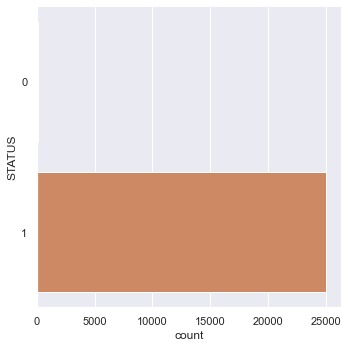

In [142]:
# Function for calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    sb.catplot(y = "STATUS", data = df, kind = "count")
    print()
 
# Function to calculating metrics of confusionMatrix
def confusionMatrix(matrix, flag):
    #TN FP
    #FN TP
    
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    if flag:
        print("Test Dataset: ")
    else:
        print("Train Dataset: ")
    
    print("True Positive Rate: {:.2f}%".format((TP * 100)/(TP + FN)))
    print("False Positive Rate: {:.2f}%\n".format((FP * 100)/(FP + TN)))
    
    print("True Negative Rate: {:.2f}%".format((TN * 100)/(TN + FP)))
    print("False Negative Rate: {:.2f}%\n".format((FN * 100)/(FN + TP)))
    print()

ratio(df)

In [143]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [144]:
# Considering numeric vars only
# Over-sampling (using SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS' and col != 'GOOD_PERCENT':
        X = pd.DataFrame(new_df[col])
        
        # Resampling the minority class. The strategy can be changed as required.
        sm = SMOTE(sampling_strategy='minority', random_state=42)

        # Fit and resample imbalanced data
        X_res, y_res = sm.fit_resample(X, y) # kmeans_smote.fit_resample(X, y)
        print(col)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 8)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        confusionMatrix(confusion_matrix(y_train, y_train_pred), 0)
        if len(top) < 3:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES:')
for key, val in top.items():
    print(f'{val}      \t: {key}')

FLAG_OWN_CAR
Train Data for FLAG_OWN_CAR
Accuracy  :	0.5011710848504205

Train Dataset: 
True Positive Rate: 0.00%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 100.00%


FLAG_OWN_REALTY
Train Data for FLAG_OWN_REALTY
Accuracy  :	0.5149313318428617

Train Dataset: 
True Positive Rate: 65.62%
False Positive Rate: 62.62%

True Negative Rate: 37.38%
False Negative Rate: 34.38%


CNT_CHILDREN
Train Data for CNT_CHILDREN
Accuracy  :	0.5394442670073459

Train Dataset: 
True Positive Rate: 12.41%
False Positive Rate: 4.50%

True Negative Rate: 95.50%
False Negative Rate: 87.59%


AMT_INCOME_TOTAL
Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.704088150750559

Train Dataset: 
True Positive Rate: 70.41%
False Positive Rate: 29.59%

True Negative Rate: 70.41%
False Negative Rate: 29.59%


FLAG_MOBIL
Train Data for FLAG_MOBIL
Accuracy  :	0.5000532311295646

Train Dataset: 
True Positive Rate: 100.00%
False Positive Rate: 100.00%

True Negative Rate: 0.00%
False Negat

# Prediction Using Balanced Dataset

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       AMT_INCOME_TOTAL  APPLICANT_AGE  YEARS_WORKING
count      2.513400e+04   25134.000000   25134.000000
mean       1.948339e+05      40.536166       7.204106
std        1.045110e+05       9.559474       6.414231
min        2.700000e+04      21.000000       0.000000
25%        1.350000e+05      33.000000       3.000000
50%        1.800000e+05      40.000000       5.000000
75%        2.250000e+05      48.000000      10.000000
max        1.575000e+06      67.000000      43.000000

After Over-sampling: 
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8380442882997977
Train Dataset: 
True Positive Rate: 85.82%
False Positive Rate: 18.21%

True Negative Rate: 81.79%
False Negative Rate: 14.18%



Goodness of Fit of Model 	Test Dataset
Classific

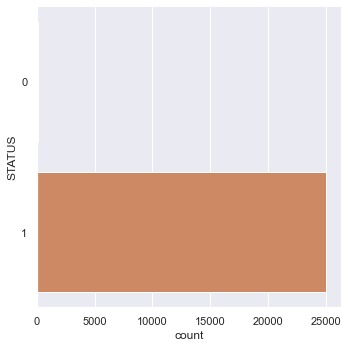

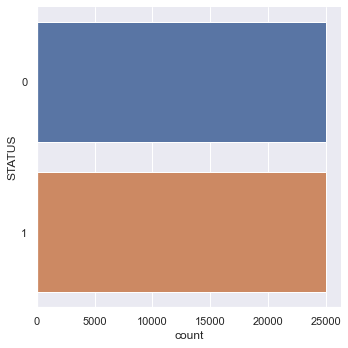

In [145]:
'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = sm.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.25)

dectree = DecisionTreeClassifier(max_depth = 8) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
confusionMatrix(confusion_matrix(y_train1, y_train_pred1), 0)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
confusionMatrix(confusion_matrix(y_test1, y_test_pred1), 1)
print()


<AxesSubplot:>

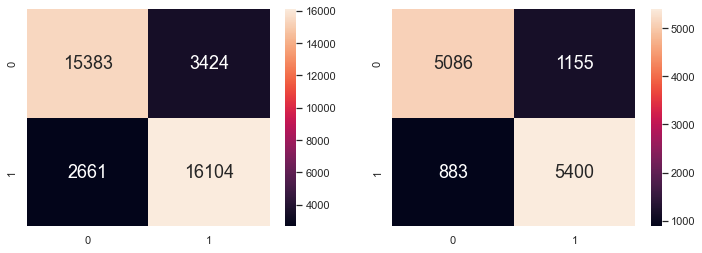

In [146]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [147]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(64,12), dpi = 600)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])

[Text(0.43154761904761907, 0.9444444444444444, 'YEARS_WORKING <= 5.0\ngini = 0.5\nsamples = 37572\nvalue = [18807, 18765]\nclass = Bad'),
 Text(0.24404761904761904, 0.8333333333333334, 'YEARS_WORKING <= 4.0\ngini = 0.475\nsamples = 20642\nvalue = [12616, 8026]\nclass = Bad'),
 Text(0.23214285714285715, 0.7222222222222222, 'YEARS_WORKING <= 4.0\ngini = 0.487\nsamples = 19192\nvalue = [11166, 8026]\nclass = Bad'),
 Text(0.13690476190476192, 0.6111111111111112, 'YEARS_WORKING <= 3.001\ngini = 0.464\nsamples = 16908\nvalue = [10719, 6189]\nclass = Bad'),
 Text(0.125, 0.5, 'YEARS_WORKING <= 3.0\ngini = 0.484\nsamples = 15074\nvalue = [8885, 6189]\nclass = Bad'),
 Text(0.05952380952380952, 0.3888888888888889, 'YEARS_WORKING <= 2.0\ngini = 0.445\nsamples = 12934\nvalue = [8605, 4329]\nclass = Bad'),
 Text(0.047619047619047616, 0.2777777777777778, 'AMT_INCOME_TOTAL <= 427501.406\ngini = 0.486\nsamples = 10424\nvalue = [6095, 4329]\nclass = Bad'),
 Text(0.023809523809523808, 0.16666666666666666

# RandomForest Classification

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 8, random_state=0) 

# Fit Random Forest on Train Data
randomForest.fit(X_train1, y_train1) 

C:\Users\iwcm3\AppData\Local\Temp/ipykernel_10640/2609625007.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=8, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9038645800063877

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9019482593420632



<AxesSubplot:>

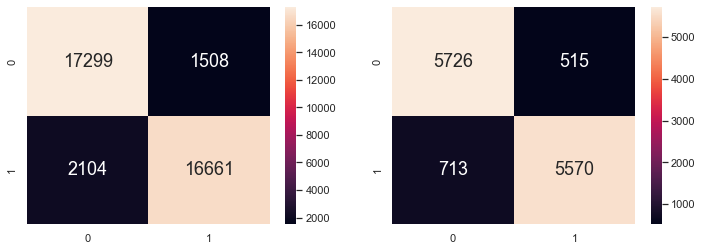

In [149]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = randomForest.predict(X_train1)
y_test_pred = randomForest.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomForest.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomForest.score(X_test1, y_test1))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [150]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred), 1)

Train Dataset: 
True Positive Rate: 88.79%
False Positive Rate: 8.02%

True Negative Rate: 91.98%
False Negative Rate: 11.21%



Test Dataset: 
True Positive Rate: 88.65%
False Positive Rate: 8.25%

True Negative Rate: 91.75%
False Negative Rate: 11.35%




# Finding Optimal Threshold

In [151]:
predictedProbability = randomForest.predict_proba(X_test1)
print(predictedProbability.shape)
predictedProbability

(12524, 2)


array([[0.06838823, 0.93161177],
       [0.28497356, 0.71502644],
       [0.2060631 , 0.7939369 ],
       ...,
       [0.59647437, 0.40352563],
       [0.47074221, 0.52925779],
       [0.32639108, 0.67360892]])

In [152]:
step = 0.01 
thresholdValue = 0.2 
rocScore = 0

while thresholdValue <=0.8: #continue to check best threshold upto probability 0.8
    tempValue = thresholdValue
    predicted = (predictedProbability[:,1] >= tempValue).astype('int') #change the class boundary for prediction
    print('Threshold', f"{round(tempValue, 2):<04}", '----', roc_auc_score(y_test1, predicted))
    if rocScore < roc_auc_score(y_test1, predicted): #store the threshold for best classification
        rocScore = roc_auc_score(y_test1, predicted)
        thrsh_score = float(thresholdValue)
    thresholdValue += step
print('--- Optimum Threshold ---',f"{round(thrsh_score, 2):<04}",'--ROC--',rocScore)

Threshold 0.20 ---- 0.6149773324390879
Threshold 0.21 ---- 0.6265940605275353
Threshold 0.22 ---- 0.6434182874142521
Threshold 0.23 ---- 0.657601920504186
Threshold 0.24 ---- 0.6801960603947705
Threshold 0.25 ---- 0.692295622870258
Threshold 0.26 ---- 0.7177744514889919
Threshold 0.27 ---- 0.731076280003957
Threshold 0.28 ---- 0.746541223404357
Threshold 0.29 ---- 0.7564798131846865
Threshold 0.30 ---- 0.7660151483965336
Threshold 0.31 ---- 0.7760327824478517
Threshold 0.32 ---- 0.7817220445380231
Threshold 0.33 ---- 0.7866977659990182
Threshold 0.34 ---- 0.7973531096939389
Threshold 0.35 ---- 0.7992027252332647
Threshold 0.36 ---- 0.8064259613263759
Threshold 0.37 ---- 0.8152413293382166
Threshold 0.38 ---- 0.8213450924958232
Threshold 0.39 ---- 0.8297689879857043
Threshold 0.40 ---- 0.8381090192764737
Threshold 0.41 ---- 0.8462199509678148
Threshold 0.42 ---- 0.8543308826591559
Threshold 0.43 ---- 0.8658098730132556
Threshold 0.44 ---- 0.8741590086127015
Threshold 0.45 ---- 0.8773871

# Applying Threshold to Prediction

In [163]:
actual_status = y_test1.values
threshold = 0.50

TP = TN = FP = FN = 0

for i in range(len(predictedProbability)):
    if predictedProbability[i][1] > threshold and actual_status[i][0]:
        TP += 1
    elif predictedProbability[i][1] < threshold and not actual_status[i][0]:
        TN += 1
    elif predictedProbability[i][1] > threshold and not actual_status[i][0]:
        FP += 1
    elif predictedProbability[i][1] < threshold and actual_status[i][0]:
        FN += 1

print(TP, TN, FP, FN)
print('total values:', TP + TN + FP + FN)
print('Accuracy:', (TP + TN) / 12524)
print('FPR:', FP / (FP + TN))

5570 5726 515 713
total values: 12524
Accuracy: 0.9019482593420632
FPR: 0.0825188271110399
